<h3>Projeto 02 - I²A²</h3>
Written by Eliohan Y. Poiati<br><br>
O projeto consiste em realizar a limpeza, preparação e análise exploratória dos dados do acidente do navio Titanic.<br>
O dataset será carregado em um DataFrame Pandas.

<h3>Abaixo veremos a descrição das colunas do nosso Dataset:</h3><br>
🔴 PassengerId = ID do passageiro do navio (primary_key).<br>
🔴 Survived = Se sobreviveu ao naufrágio (1), se não (0).<br>
🔴 Pclass = Tipo de classe da passagem (1, 2 e 3), sendo 1 a melhor classe, 2 a classe mediana e 3 a pior classe de passagem.<br>
🔴 Name = Nome do Passageiro.<br>
🔴 Sex = Gênero do passageiro, sendo homem ou mulher (male ou female).<br>
🔴 Age = Idade do passageiro quando ocorreu o acidente.<br>
🔴 SibSp = Número de parentes a bordo, sendo irmão ou conjuge.<br>
🔴 Parch = Número de pais ou filhos a bordo.<br>
🔴 Ticket = ID do Ticket.<br>
🔴 Fare = Valor da Passagem.<br>
🔴 Cabin = ID da cabine do passageiro<br>
🔴 Embarked = Local onde embarcou.<br>

In [1]:
!pip install pandas
!pip install seaborn
!pip install missingno
!pip install numpy
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Importamos as bibliotecas
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Lemos o arquivo a partir de indice 'PassengerId' e salvamos como df (DataFrame)
df = pd.read_csv('titanic-data.csv',index_col='PassengerId')

Agora iremos visualizar algumas analises rapidas utilizando: 'df', 'df.info()', 'df.describe()' e 'df.count()' e plotar alguns graficos para visualização. <br>
Assim conseguimos visualizar o DataFrame e verificar se os formatos estão corretos e se alguma informação precisa de correção.

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Com o .describe() conseguimos verificar que possivelmente há outliers em 'Fare' que o valor que foi pago pelo ticket esta dando uma mediana de 14,45 e uma média de 32,20.

In [6]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

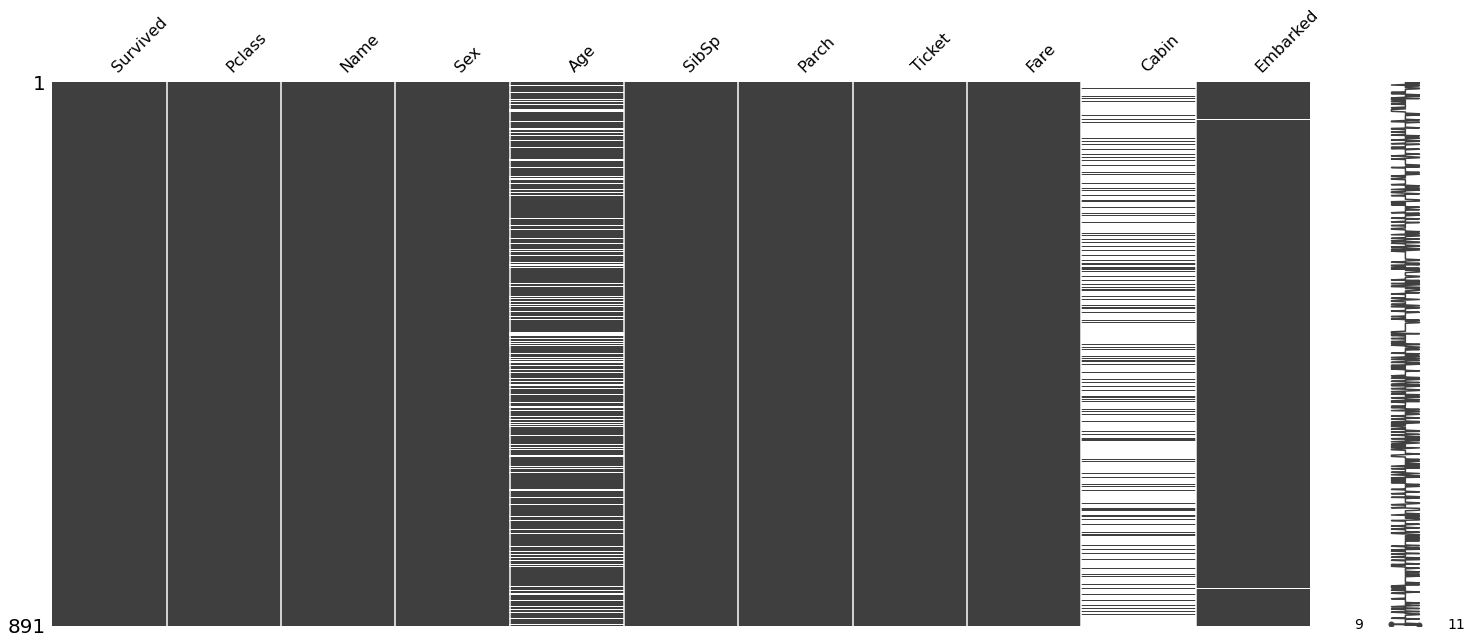

In [7]:
msno.matrix(df);

Agora verificaremos a porcentagem dos dados faltantes em nosso dataset !

In [8]:
round(df.isnull().mean() *100,1)

Survived     0.0
Pclass       0.0
Name         0.0
Sex          0.0
Age         19.9
SibSp        0.0
Parch        0.0
Ticket       0.0
Fare         0.0
Cabin       77.1
Embarked     0.2
dtype: float64

Agora precisamos verificar quantas linhas estão preenchidas, sem nenhum dado faltante.

In [9]:
print('Total de Passageiros com todas as informações preenchidas (linhas): {}'.format(df.dropna().shape[0]))
print('Porcentagem de passageiros com todas as informções preenchidas: {}'.format(round(df.dropna().shape[0] / len(df) *100,1))+'%')

Total de Passageiros com todas as informações preenchidas (linhas): 183
Porcentagem de passageiros com todas as informções preenchidas: 20.5%


De acordo com nossos outputs conseguimos perceber que há dados faltantes em nosso dataset como (idade, 19,9% faltante) 'Age', (cabine, 77,7% faltante) 'Cabin' e  (embarcou 00,2%) 'Embarked',antes de tomar qualquer decisão precisamos saber o peso dessas informações.<br><br>
Podemos verificar tambem que do total de 891 linhas temos apenas 20.5% (183) totalmente preenchidas.<br><br>
Uma informação que parece ser muito relevante é a coluna Survived, que indica qual dos passageiros sobreviveram e podemos verificar se conseguimos extrair algum insight com outras informações do dataframe.<br><br>
Para isso irei dividir os dados categóricos dos numéricos assim conseguimos visualizar melhor as possibilidades.

Agora iremos verificar a quantidade de dados faltantes para a coluna Age, Cabin e Embarked

In [10]:
print('Quantidade de registros faltantes {}'.format(df[df['Age'].isnull()].shape[0]))
df[df['Age'].isnull()]

Quantidade de registros faltantes 177


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [11]:
print('Quantidade de registros faltantes em Cabine (Cabin): {}'.format(df[df['Cabin'].isnull()].shape[0]))
df[df['Cabin'].isnull()]

Quantidade de registros faltantes em Cabine (Cabin): 687


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [12]:
print('Quantidade de registros faltantes em Embarcou (Embarked): {}'.format(df[df['Embarked'].isnull()].shape[0]))
df[df['Embarked'].isnull()]

Quantidade de registros faltantes em Embarcou (Embarked): 2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<h4>Substituindo valores faltantes:</h4><br> 
Com isso conseguimos verificar que temos 177 Linhas faltando a 'Age' Idade, 687 faltando a Cabine 'Cabin' e 2 linhas faltando o Embarque (Embarked)
<br><br>
Iremos resolver a coluna "Age", defini como melhor estratégia pegar a média de idade por tipo de título dado aos tripulantes<br>(Ex: Mr., Mrs., Sir.) <br>E assim realizar a subtituição dos valores baseados em seus titulos. <br>
Substituimos a Age pelo valor do titulo e o Embarked pela moda.



In [13]:
df['Title'] = df.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [14]:
Age_name = df[['Title','Age']].groupby(df['Title']).mean().round(0)
Age_name

,Age
Title,
Capt,70.0
Col,58.0
Don,40.0
Dr,42.0
Jonkheer,38.0
Lady,48.0
Major,48.0
Master,5.0
Miss,22.0


In [15]:
df.Age.replace('NaN', np.NaN, inplace=True)
df.loc[df['Age'].isnull(),'Age'] = df['Title'].map(Age_name.Age)

In [16]:
 df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [17]:
Age_name

,Age
Title,
Capt,70.0
Col,58.0
Don,40.0
Dr,42.0
Jonkheer,38.0
Lady,48.0
Major,48.0
Master,5.0
Miss,22.0


In [18]:
df.loc[:,['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

Retirando valores inuteis

In [19]:
df.drop('Ticket', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


<h4>Insights que podemos ter:</h4><br>
Os passageiros de Classe maior tiveram maiores chances der sobreviver?<br>
Quantas pessoas sobreviveram ?<br>
Temos uma influencia da idade na sobrevivencia?<br>
Quantos dos sobreviventes eram mulheres, ela tiveram mais chances de sobreviver?<br>


In [21]:
df['Not_Survived'] = df['Survived'].map({0:1,1:0})

Os passageiros de Classe maior tiveram maiores chances de sobreviver?


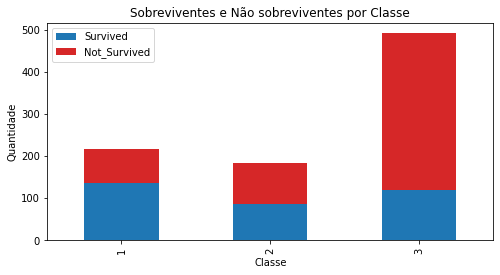

In [22]:
print('Os passageiros de Classe maior tiveram maiores chances de sobreviver?')
df.pivot_table(index='Pclass', values=('Survived','Not_Survived'), aggfunc=np.sum)[['Survived','Not_Survived']].plot(
    kind='bar', figsize=(8,4), label=('1','2','3'),
    color=('tab:blue','tab:red'), stacked=True,
    title='Sobreviventes e Não sobreviventes por Classe').set_xlabel('Classe')
plt.ylabel('Quantidade');

Vemos que há uma taxa altissima de mortos na 3º classe, e há uma redução da taxa de sobrevivência da 1º para 2º classe e para a 3º consecutivamente.

Quantas pessoas sobreviveram ?


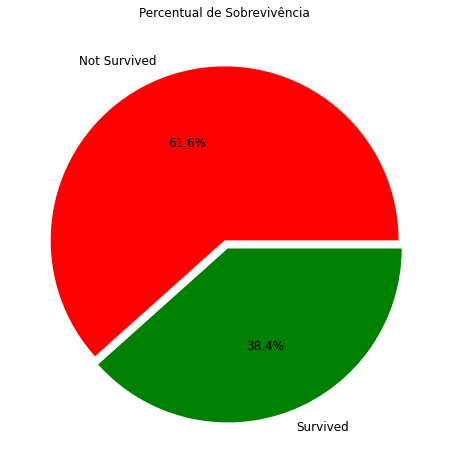

In [23]:
print('Quantas pessoas sobreviveram ?') 
df['Survived'].value_counts().plot.pie(colors=('Red','Green'),
                                        title='Percentual de Sobrevivência',
                                        fontsize=12, autopct='%1.1f%%',
                                        explode = (0, 0.05),
                                        labels=('Not Survived','Survived'),
                                        figsize=(8,8)).set_ylabel('');

In [24]:
 df_1 = df[df['Survived']==1]
df_0 = df[df['Survived']==0]

Temos uma influencia da idade na sobrevivencia?
Comparativo de Idade:


C:\Users\Epoiati\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Epoiati\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


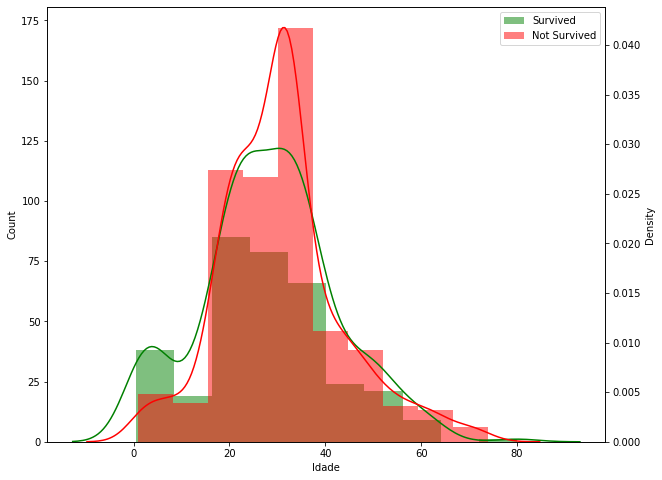

In [25]:
print('Temos uma influencia da idade na sobrevivencia?')
fig, ax= plt.subplots(figsize=(10,8))
ax2 = ax.twinx()
  
ax.hist(df_1['Age'], alpha= 0.5, color="Green", label='Survived')
ax.hist(df_0['Age'], alpha= 0.5, color="Red", label='Not Survived')
  
sns.distplot(df_1['Age'], color="Green", hist=False, ax=ax2)
sns.distplot(df_0['Age'], color="Red", hist=False, ax=ax2)
  
print('\033[1m' +'Comparativo de '+'Idade'+':'+ '\033[0m')
ax.set_xlabel('Idade')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show;

Quantos dos sobreviventes eram mulheres, elas tiveram mais chances de sobreviver?


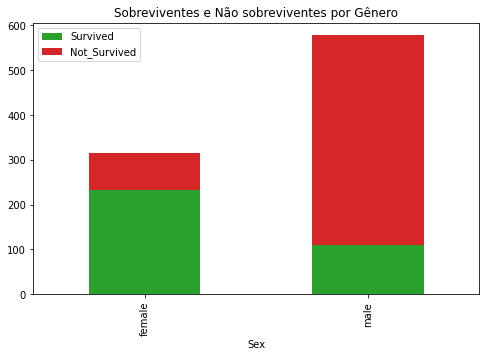

In [26]:
print('Quantos dos sobreviventes eram mulheres, elas tiveram mais chances de sobreviver?')
ax = df.pivot_table(index='Sex', values=('Survived','Not_Survived'), aggfunc=np.sum)[['Survived','Not_Survived']].plot.bar(figsize=(8,5), label=('female','male'),
    color=('tab:green','tab:Red'), stacked=True,
    title='Sobreviventes e Não sobreviventes por Gênero')